# Introduction to text analysis II

**introducing utilities for text analysis**

Getting the punctuation list

In [1]:
import string

punctuation = string.punctuation

print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


### tokenization ###

A *token* is a basic unity of a sentence or of a text. Usually it coincides with a word.

**split a string**

In [2]:
a = "this is a string "
tokens = a.split() ## split !
print(tokens)

['this', 'is', 'a', 'string']


**split()** is the most useful function for a data scientist ! (no jokes !))

we can set a custom delimiter

In [3]:
a = "this@is a string@ with a non common delimiter@@"
tokens_with_delimiter = a.split("@")
print(tokens_with_delimiter)

['this', 'is a string', ' with a non common delimiter', '', '']


# File formats for datascience #

**Json file format**

**CSV: comma separated value**

It is the simplest way (yet powerful) to organize data in columns similarly to a spreadsheet. Can be managed with spreadsheet softwares: libreoffice, excel.

* The character that divides the fields is called "separator" or "delimiter"
* The character that encloses the text is the "quoting char"
* The column name is indicated as "header"

CSV must not have any graphical element, any line, any border !



** XML format file **

### managing json, csv and xml ###

In [4]:
import json

js = """
{"menu": {
  "id": "file",
  "value": "File",
  "popup": {
    "menuitem": [
      {"value": "New", "onclick": "CreateNewDoc()"},
      {"value": "Open", "onclick": "OpenDoc()"},
      {"value": "Close", "onclick": "CloseDoc()"}
    ]
  }
}}
"""



**transform a json string into a dictionary**

In [5]:

load = json.loads(js) ## load string

## accessing internal properties: 

print(load['menu']['id'])

## iterating among internal nested properties
for menuitem in load['menu']['popup']['menuitem']:
    print(menuitem['value'])

file
New
Open
Close


**transform a dictionary into a json string**

In [6]:
dic = {'a' : {'b' : [1,2,3]}, 'c' : 1}
json_string = json.dumps(dic)

## please notice the different encoding "double quoting"
print(json_string)

{"a": {"b": [1, 2, 3]}, "c": 1}


online read of a csv

In [9]:
import requests
import pandas as pd

csvdown = "https://datahub.io/core/global-temp/r/monthly.csv"

req = requests.get(csvdown)

# save the file:

csvout = "monthly.csv"
out = open(csvout,"w")
out.write(req.text)
out.close()


c = pd.read_csv(csvout)

In [10]:
c.head(10)

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292
5,GISTEMP,2016-10-06,0.8900
6,GCAG,2016-09-06,0.8767
7,GISTEMP,2016-09-06,0.8700
8,GCAG,2016-08-06,0.8998
9,GISTEMP,2016-08-06,0.9800


In [11]:
c[c['Source'] == 'GCAG'].sort_values(by = 'Mean',ascending = False).head()

,Source,Date,Mean
18,GCAG,2016-03-06,1.2245
20,GCAG,2016-02-06,1.1921
24,GCAG,2015-12-06,1.1219
16,GCAG,2016-04-06,1.0733
22,GCAG,2016-01-06,1.0569


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['load']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


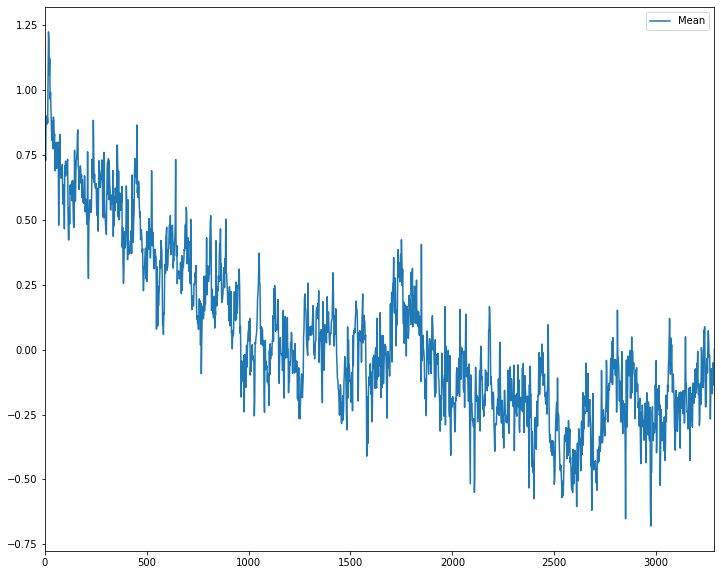

In [12]:
%pylab inline
df = c[c['Source'] == 'GCAG']
df.plot(figsize=(12,10))

### working csv with csv module and dictreader ###

DictReader from the module csv is able to understand the name of the columns (if available) and to map the columns to the name

In [15]:
import csv

In [16]:
with open('monthly.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row['Source'], row['Date'], row['Mean'])
        print(type(row['Mean'])) ## ! it is a string not a float !
        break
    

GCAG 2016-12-06 0.7895
<class 'str'>


### Exercises: ###

* go deep in the csv module to treat the case of a malformed csv
- steps:
    1) create a malformed csv
    2) try to read it with pandas
    3) open id with dictreader or csv
    